<a href="https://colab.research.google.com/github/jso4342/python_toy_project/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#필요 모듈 읽어오기 
import os
import sys
import requests

# api 사용을 위한 개발자 정보 
client_id = "Yri6CAx83ZrZWlzj7Hr3"
client_secret = "qtWrCzCWof"

url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

files = {'image': open('baek.png', 'rb')}

# id, secret 을 딕셔너리로 전환 
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 실제 사용 부분 
response = requests.post(url,  files=files, headers=headers)
                      # ( 주소, 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":426,"height":427},"faceCount":1},"faces":[{"roi":{"x":100,"y":108,"width":202,"height":202},"landmark":{"leftEye":{"x":150,"y":154},"rightEye":{"x":247,"y":157},"nose":{"x":189,"y":214},"leftMouth":{"x":152,"y":258},"rightMouth":{"x":233,"y":266}},"gender":{"value":"male","confidence":0.998823},"age":{"value":"19~23","confidence":1.0},"emotion":{"value":"neutral","confidence":0.999999},"pose":{"value":"frontal_face","confidence":0.999328}}]}


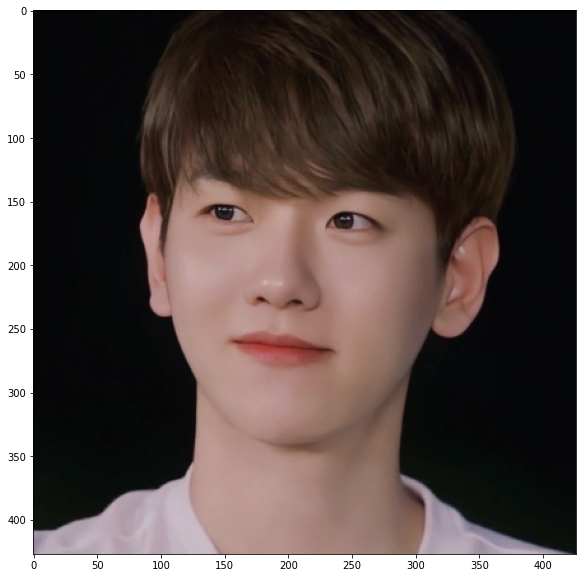

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

img = mpimg.imread('baek.png')

#프레임 설정 
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
import json

parsed = json.loads(response.text) # 넘겨받은 분석결과를 json 딕셔너리로 변환 
print(json.dumps(parsed, indent=3, ensure_ascii=False))
# ensure_ascii = False : 한글 깨짐 방지 
print(type(parsed))

{
   "info": {
      "size": {
         "width": 426,
         "height": 427
      },
      "faceCount": 1
   },
   "faces": [
      {
         "roi": {
            "x": 100,
            "y": 108,
            "width": 202,
            "height": 202
         },
         "landmark": {
            "leftEye": {
               "x": 150,
               "y": 154
            },
            "rightEye": {
               "x": 247,
               "y": 157
            },
            "nose": {
               "x": 189,
               "y": 214
            },
            "leftMouth": {
               "x": 152,
               "y": 258
            },
            "rightMouth": {
               "x": 233,
               "y": 266
            }
         },
         "gender": {
            "value": "male",
            "confidence": 0.998823
         },
         "age": {
            "value": "19~23",
            "confidence": 1.0
         },
         "emotion": {
            "value": "neutral",
            "con

In [ ]:
###################################################
#       분석 결과 데이터 정리를 위한 파이썬 기본 문법        #
###################################################

# dict

dict = {'Name':'백현', 'Age':31, 'etc':['neutral','frontal_face']}

# 키 값 출력
print(dict.keys())

# 밸류 값 출력 
print(dict.values())

# 키 값을 이용한 밸류값 호출
print(dict['Name'])
print(dict.get('Name'))

# print(dict['Gender']) 없는 키값 입력 시 오류남 
print(dict.get('Gender')) # 오류 안나는 대신 None 
print(dict.get('Gender', '값이 없음')) # 값이 없을 때 출력 메세지까지 지정 가능 

dict_keys(['Name', 'Age', 'etc'])
dict_values(['백현', 31, ['neutral', 'frontal_face']])
백현
백현
None
값이 없음


In [ ]:
##################################################
#       분석 결과 json 을 딕셔너리로 변환 parsed        #
##################################################

parsed.keys()

parsed['faces']

[{'age': {'confidence': 1.0, 'value': '19~23'},
  'emotion': {'confidence': 0.999999, 'value': 'neutral'},
  'gender': {'confidence': 0.998823, 'value': 'male'},
  'landmark': {'leftEye': {'x': 150, 'y': 154},
   'leftMouth': {'x': 152, 'y': 258},
   'nose': {'x': 189, 'y': 214},
   'rightEye': {'x': 247, 'y': 157},
   'rightMouth': {'x': 233, 'y': 266}},
  'pose': {'confidence': 0.999328, 'value': 'frontal_face'},
  'roi': {'height': 202, 'width': 202, 'x': 100, 'y': 108}}]

In [ ]:
parsed['faces'][0]['roi']   # roi : 사진에서 얼굴의 위치 값 

{'height': 202, 'width': 202, 'x': 100, 'y': 108}

In [ ]:
# 전체 정보 종합 추출
x,y,w,h = parsed['faces'][0]['roi'].values()
# 딕셔너리는 기본적으로 순서가 없다 

gender, gender_c = parsed['faces'][0]['gender'].values()
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()

# 딕셔너리 특성상 순서가 다르게 나올 수 있으므로 한 번은 확인해야 한다 

In [ ]:
# 추출한 정보를 사진에 올리기 적합한 형태로 가공

annot = gender + ' : ' + str(gender_c * 100) + '%' + \
        '\n' + emotion + ' : ' + str(emotion_c * 100)+ '%' + \
        '\n' + age + ' : ' + str(age_c * 100)+ '%'

print(annot)

male : 99.8823%
neutral : 99.9999%
19~23 : 100.0%


Text(100, 350, 'male : 99.8823%\nneutral : 99.9999%\n19~23 : 100.0%')

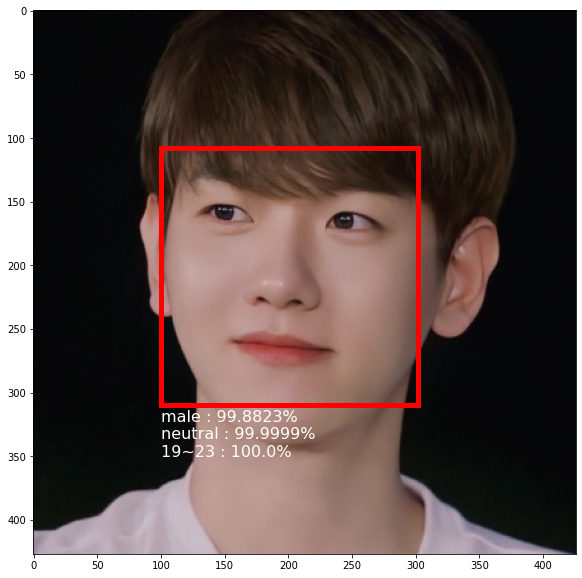

In [ ]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

img = mpimg.imread('baek.png')

fig, ax = plt.subplots(figsize=(10,10)) # fig 컨테이너, ax 수정한 사진 
ax.imshow(img)                          # 기본 사진 

# 사진 수정 
rect_face = patches.Rectangle((x,y),w,h,  # x,y 얼굴의 시작지점 / w,h 얼굴의 크기
                              linewidth = 5,
                              edgecolor ='r',
                              facecolor = 'none')

ax.add_patch(rect_face)

plt.text(x, y + h + 40, annot, fontsize = 16, color='white')

Text(79, 365, 'male : 57.9964%\nneutral : 99.6355%\n22~26 : 40.7295%')

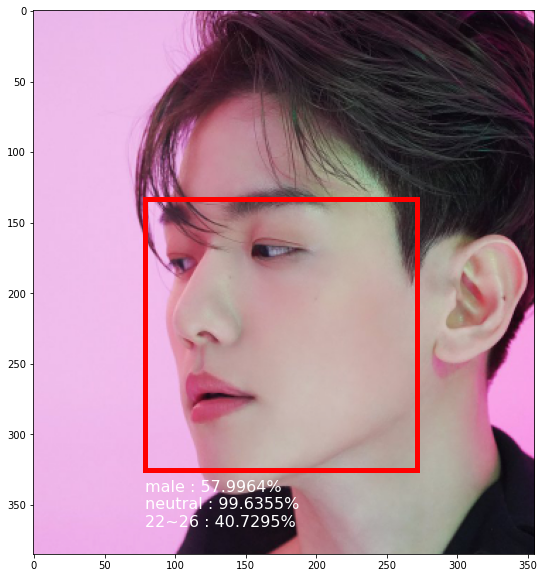

In [ ]:
files = {'image': open('hyun.png', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

parsed = json.loads(response.text) # 넘겨받은 분석결과를 json 딕셔너리로 변환 

x,y,w,h = parsed['faces'][0]['roi'].values()
# 딕셔너리는 기본적으로 순서가 없다 

gender, gender_c = parsed['faces'][0]['gender'].values()
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()

# 사진에 정보 입력 
img = mpimg.imread('hyun.png')

fig, ax = plt.subplots(figsize=(10,10)) 
ax.imshow(img)                      

rect_face = patches.Rectangle((x,y),w,h,  
                              linewidth = 5,
                              edgecolor ='r',
                              facecolor = 'none')

ax.add_patch(rect_face)

annot = gender + ' : ' + str(gender_c * 100) + '%' + \
        '\n' + emotion + ' : ' + str(emotion_c * 100)+ '%' + \
        '\n' + age + ' : ' + str(age_c * 100)+ '%'

plt.text(x, y + h + 40, annot, fontsize = 16, color='white')

In [ ]:
# 코랩 그래프에서 한글 설정 방법 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 위 3줄 실행 후 Runtime - Restart - Runtime

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

{"info":{"size":{"width":290,"height":336},"faceCount":1},"faces":[{"celebrity":{"value":"엄기준","confidence":0.409848}}]}
{
   "info": {
      "size": {
         "width": 290,
         "height": 336
      },
      "faceCount": 1
   },
   "faces": [
      {
         "celebrity": {
            "value": "엄기준",
            "confidence": 0.409848
         }
      }
   ]
}
<class 'dict'>


Text(100, 230, '엄기준 : 0.409848')

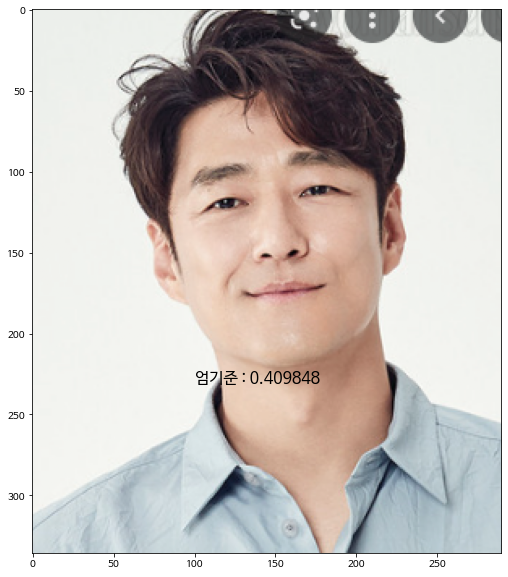

In [ ]:

import os
import sys
import requests
import json

# 네이버에 사진 전송후 분석 결과 받기
client_id = "Yri6CAx83ZrZWlzj7Hr3"
client_secret = "qtWrCzCWof"
# url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('photo.png', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)


# 사진에 정보 올리기
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rc('font', family='NanumBarunGothic')

parsed = json.loads(response.text) # 넘겨받은 분석결과를 json 딕셔너리로 변환 
print(json.dumps(parsed, indent=3, ensure_ascii=False))
# ensure_ascii = False : 한글 깨짐 방지 
print(type(parsed))

# ensure_ascii = False : 한글 깨짐 방지 

celebrity, celebrity_c = parsed['faces'][0]['celebrity'].values()


img = mpimg.imread('photo.png')
fig, ax = plt.subplots(figsize=(10,10))   # fig 액자(?), ax 수정한 사진 의 크기 설정
ax.imshow(img)                            # 먼저 기본사진



annot = celebrity + ' : ' + str(celebrity_c)

plt.text(100, 230, annot, fontsize = 16, color='black')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


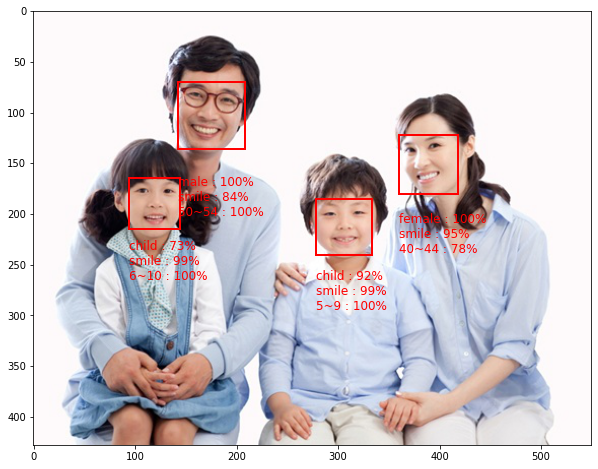

In [6]:
#################################################
#                여러 사람 사진 처리                 #
#################################################

import os
import sys
import requests
import json

# 사진에 정보 올리기
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rc('font', family='NanumBarunGothic')

import math

# 네이버에 사진 전송후 분석 결과 받기
client_id = "Yri6CAx83ZrZWlzj7Hr3"
client_secret = "qtWrCzCWof"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('family.jpeg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code

img = mpimg.imread('family.jpeg')
# parsed.keys()
fig, ax = plt.subplots(figsize=(10,10)) 
lenface = len(parsed['faces'])
ax.imshow(img) 

for i in range(0, lenface):
  x, y, h, w = parsed['faces'][i]['roi'].values()
  gender, gender_c = parsed['faces'][i]['gender'].values()
  age, age_c = parsed['faces'][i]['age'].values()
  emotion, emotion_c = parsed['faces'][i]['emotion'].values()
  # 딕셔너리는 unordered, 즉 순서가 없으므로 최초 한 번 출력되는 순서를 확인하여 수정한다 

  annot = gender + ' : ' + str(round(gender_c * 100)) + '%' + \
          '\n' + emotion + ' : ' + str(round(emotion_c * 100))+ '%' + \
          '\n' + age + ' : ' + str(round(age_c * 100))+ '%'

  parsed = json.loads(response.text) # 넘겨받은 분석결과를 json 딕셔너리로 변환 
  img = mpimg.imread('family.jpeg')
  rect_face = patches.Rectangle((x,y),w,h,
                                linewidth=2,
                                edgecolor='r',
                                facecolor='none'
                                )
  ax.add_patch(rect_face)
  plt.text(x, y+ (2*h), annot, fontsize = 12, color='red')



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text

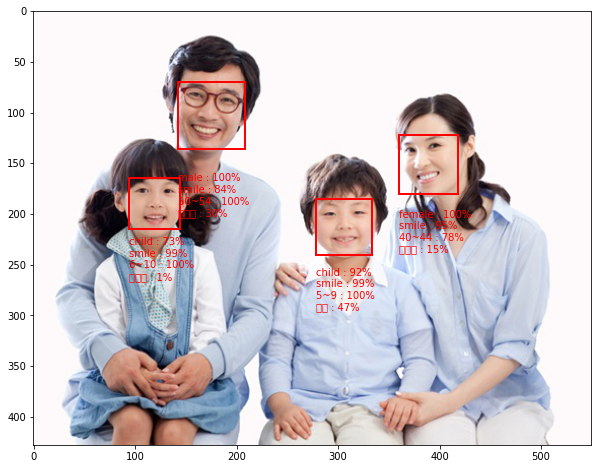

In [7]:
########################################################
#                여러 사람 사진 처리 + 닮은꼴                #
########################################################

import os
import sys
import requests
import json

# 사진에 정보 올리기
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rc('font', family='NanumBarunGothic')

import math

# 네이버에 사진 전송후 분석 결과 받기
client_id = "Yri6CAx83ZrZWlzj7Hr3"
client_secret = "qtWrCzCWof"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
url2 = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('family.jpeg', 'rb')}
files2 = {'image': open('family.jpeg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
response2 = requests.post(url2,  files=files2, headers=headers)

parsed = json.loads(response.text)
parsed2 = json.loads(response2.text)
# parsed.keys()

fig, ax = plt.subplots(figsize=(10,10)) 
ax.imshow(img) 

for i in range(len(parsed['faces'])):
  x, y, h, w = parsed['faces'][i]['roi'].values()
  gender, gender_c = parsed['faces'][i]['gender'].values()
  age, age_c = parsed['faces'][i]['age'].values()
  emotion, emotion_c = parsed['faces'][i]['emotion'].values()
  
  celebrity, celebrity_c = parsed2['faces'][i]['celebrity'].values()

  annot = gender + ' : ' + str(round(gender_c * 100)) + '%' + \
          '\n' + emotion + ' : ' + str(round(emotion_c * 100))+ '%' + \
          '\n' + age + ' : ' + str(round(age_c * 100))+ '%'+ \
          '\n' + celebrity + ' : ' + str(round(celebrity_c * 100))+ '%'

  parsed = json.loads(response.text) # 넘겨받은 분석결과를 json 딕셔너리로 변환 
  img = mpimg.imread('family.jpeg')
  rect_face = patches.Rectangle((x,y),w,h,
                                linewidth=2,
                                edgecolor='r',
                                facecolor='none'
                                )
  ax.add_patch(rect_face)
  plt.text(x, y+ (2*h), annot, fontsize = 10, color='red')

